In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt


import torch
import sys
import socket
import os
from pathlib import Path

HOST = socket.gethostbyname(socket.gethostname())
FILE = Path.cwd()
ROOT = FILE.parents[0]
WORK_DIR = os.path.dirname(ROOT)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
JSON_DIR = os.path.join(WORK_DIR,"Tensorbot_NLP_System", "data", "dicts","intents.json")

with open(JSON_DIR, "r") as f:
    data_json = json.load(f)
    
df = pd.DataFrame(data_json['intents'])
df.head()

,tag,patterns,responses
0,info,"[Can you give me room information?, What is ro...","[Let me search, I'll find the information for ..."
1,thanks,"[Thanks, Thank you, That's helpful, Thank's a ...","[Happy to help!, Any time!, My pleasure!, You'..."
2,moving,"[Go, Go to, Come, Come to, Can you take me to ...","[Oke, let me help you, Okay, follow me, Tracki..."
3,tour,[I am new to visiting the school for the first...,"[Okay I'll take you on a trip, Let's start the..."


In [3]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)

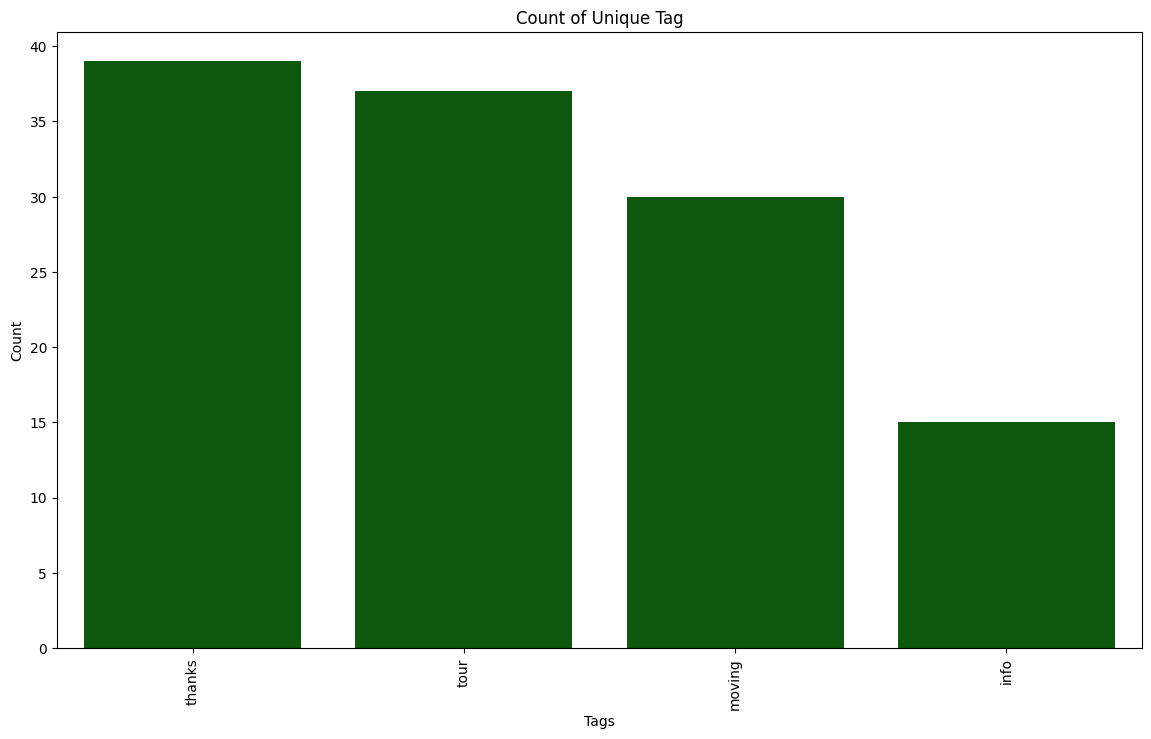

In [4]:
tag_counts = df['tag'].value_counts().reset_index()

tag_counts.columns = ['tag', 'count']
plt.figure(figsize=(14, 8))
sns.barplot(x = "tag", y="count", data = tag_counts, order=tag_counts["tag"], color = "darkgreen")

plt.xlabel("Tags")
plt.ylabel("Count")
plt.title("Count of Unique Tag")

plt.xticks(rotation = 90)
plt.show()


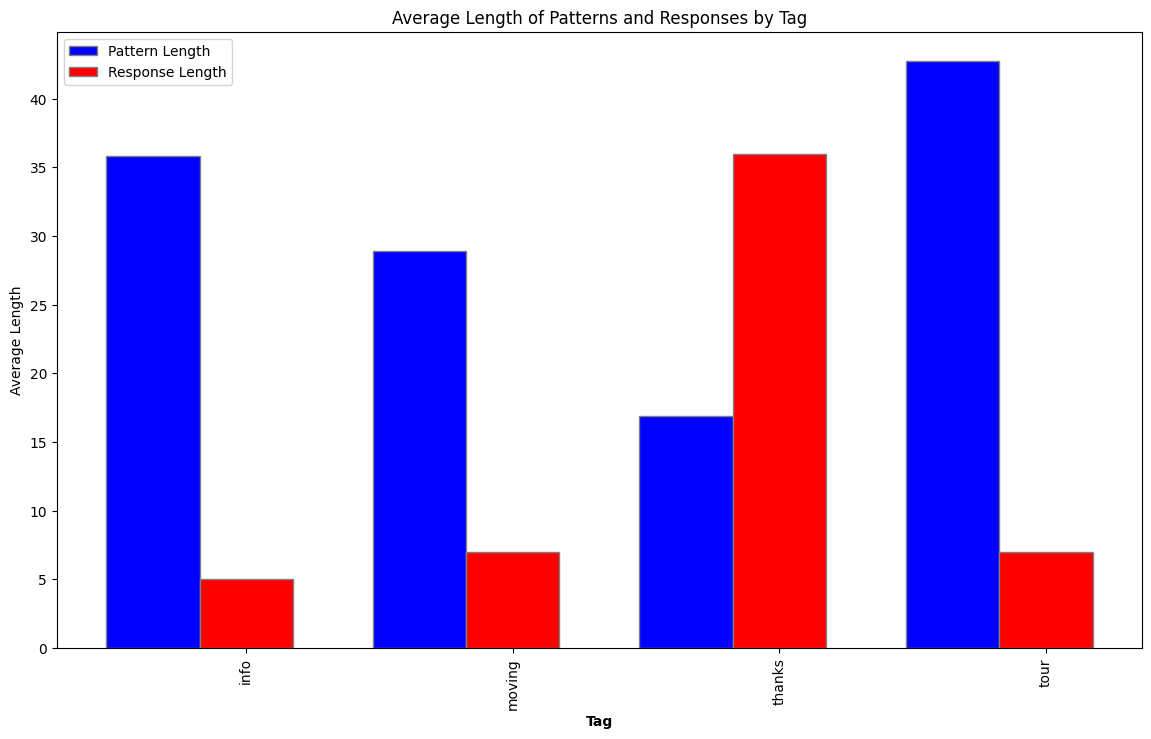

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has 'patterns' and 'responses' columns
df["len_pattern"] = df["patterns"].apply(lambda x: len(x))
df["len_response"] = df["responses"].apply(lambda x: len(x))

avg_len_pattern = df.groupby("tag")["len_pattern"].mean()
avg_len_response = df.groupby("tag")["len_response"].mean()

avg_len_df = pd.DataFrame({
    "avg_len_pattern": avg_len_pattern,
    "avg_len_response": avg_len_response
}).reset_index()

plt.figure(figsize=(14, 8))
bar_width = 0.35

r1 = range(len(avg_len_df))
r2 = [x + bar_width for x in r1]

plt.bar(r1, avg_len_df['avg_len_pattern'], color='b', width=bar_width, edgecolor='grey', label='Pattern Length')
plt.bar(r2, avg_len_df['avg_len_response'], color='r', width=bar_width, edgecolor='grey', label='Response Length')

plt.xlabel('Tag', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(avg_len_df))], avg_len_df['tag'], rotation=90)

plt.ylabel('Average Length')
plt.title('Average Length of Patterns and Responses by Tag')
plt.legend()
plt.show()


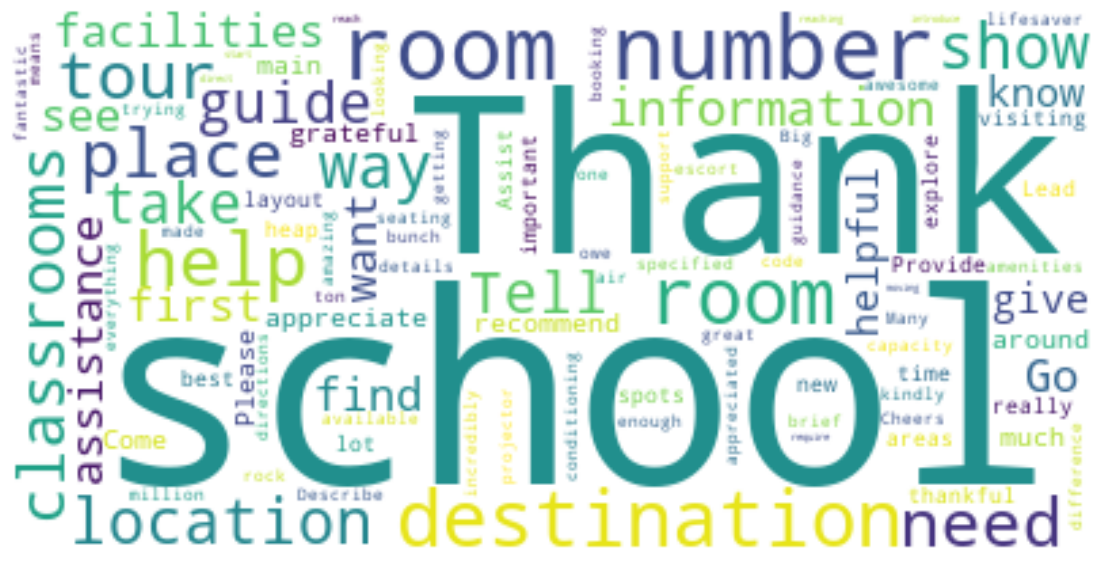

In [6]:
from wordcloud import WordCloud

df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])

wc = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='black').generate(all_patterns)

# Remove the axis and display the data as image
plt.figure(figsize=(14, 8))
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()